<a href="https://colab.research.google.com/github/UtsavRao/PRODIGY_DS_03/blob/main/TASK3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# Importing all necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# Using data from Apple's stock.
df = pd.read_csv('all_stocks_5yr.csv')

In [14]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500.0,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000.0,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000.0,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500.0,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900.0,AAL


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328712 entries, 0 to 328711
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    328712 non-null  object 
 1   open    328706 non-null  float64
 2   high    328708 non-null  float64
 3   low     328708 non-null  float64
 4   close   328711 non-null  float64
 5   volume  328711 non-null  float64
 6   Name    328711 non-null  object 
dtypes: float64(5), object(2)
memory usage: 17.6+ MB


In [17]:
df.describe()

,open,high,low,close,volume
count,328706.000000,328708.000000,328708.000000,328711.000000,3.287110e+05
mean,84.478067,85.244721,83.696110,84.497252,4.728202e+06
std,94.481248,95.270502,93.636502,94.481418,1.047678e+07
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,39.050000,39.460000,38.660075,39.080000,1.103843e+06
50%,62.680000,63.250700,62.090000,62.700000,2.115160e+06
75%,93.840000,94.625000,93.040000,93.900000,4.260432e+06
max,1477.390000,1498.000000,1450.040000,1450.890000,4.313326e+08


In [18]:
df.shape

(328712, 7)

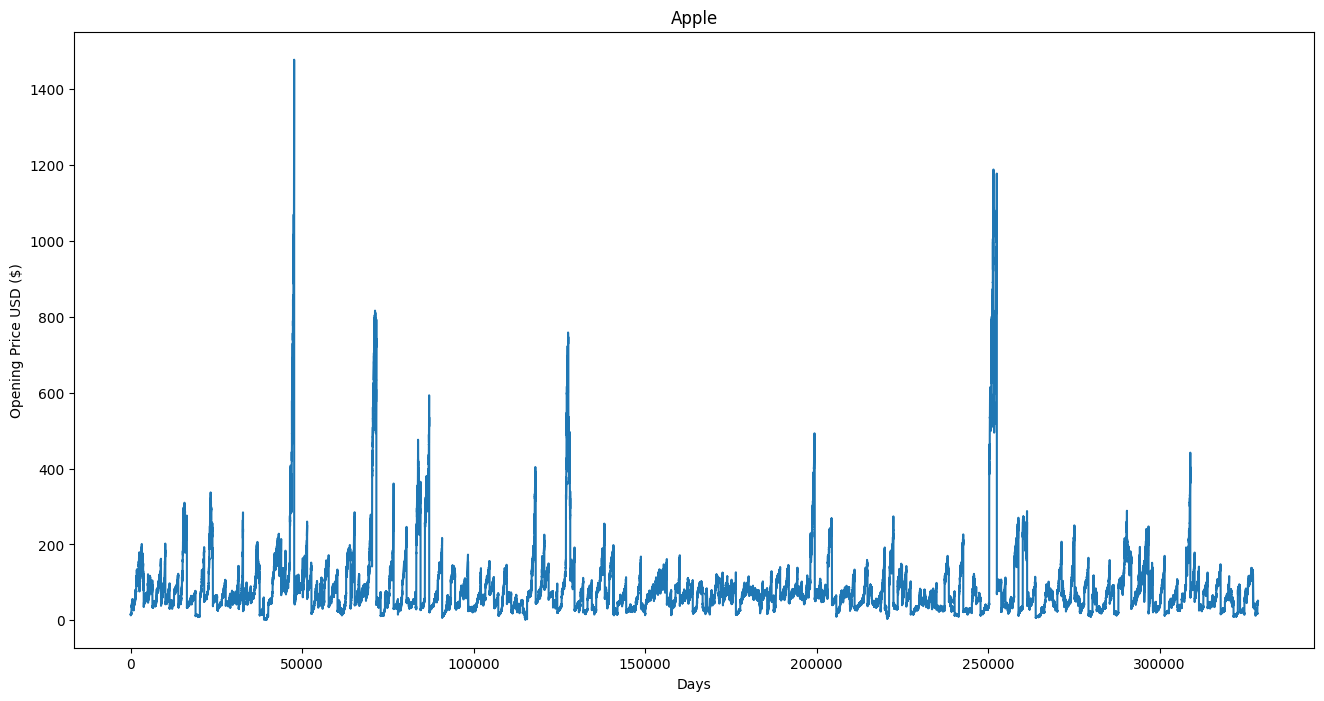

In [19]:
# Visualizing the opening prices of the data.
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('Opening Price USD ($)')
plt.plot(df['open'])
plt.show()

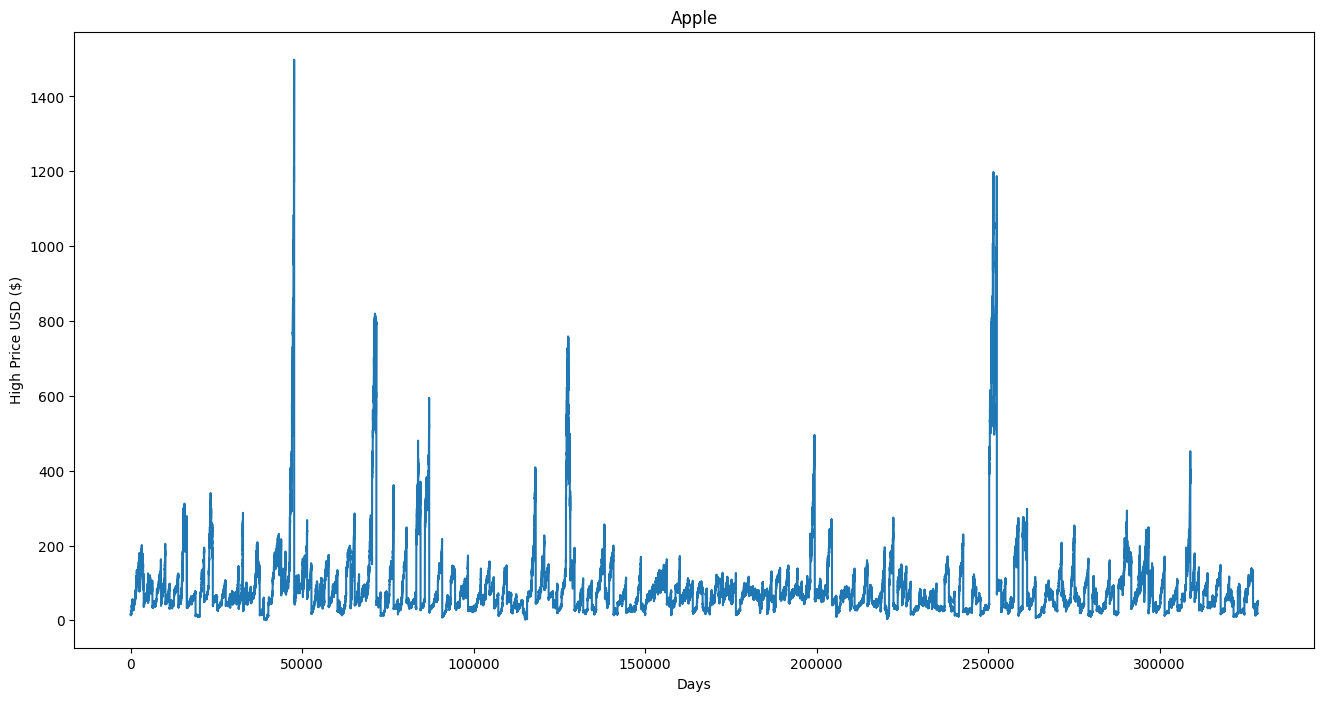

In [20]:
# Visualizing the high prices of the data.
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('High Price USD ($)')
plt.plot(df['high'])
plt.show()


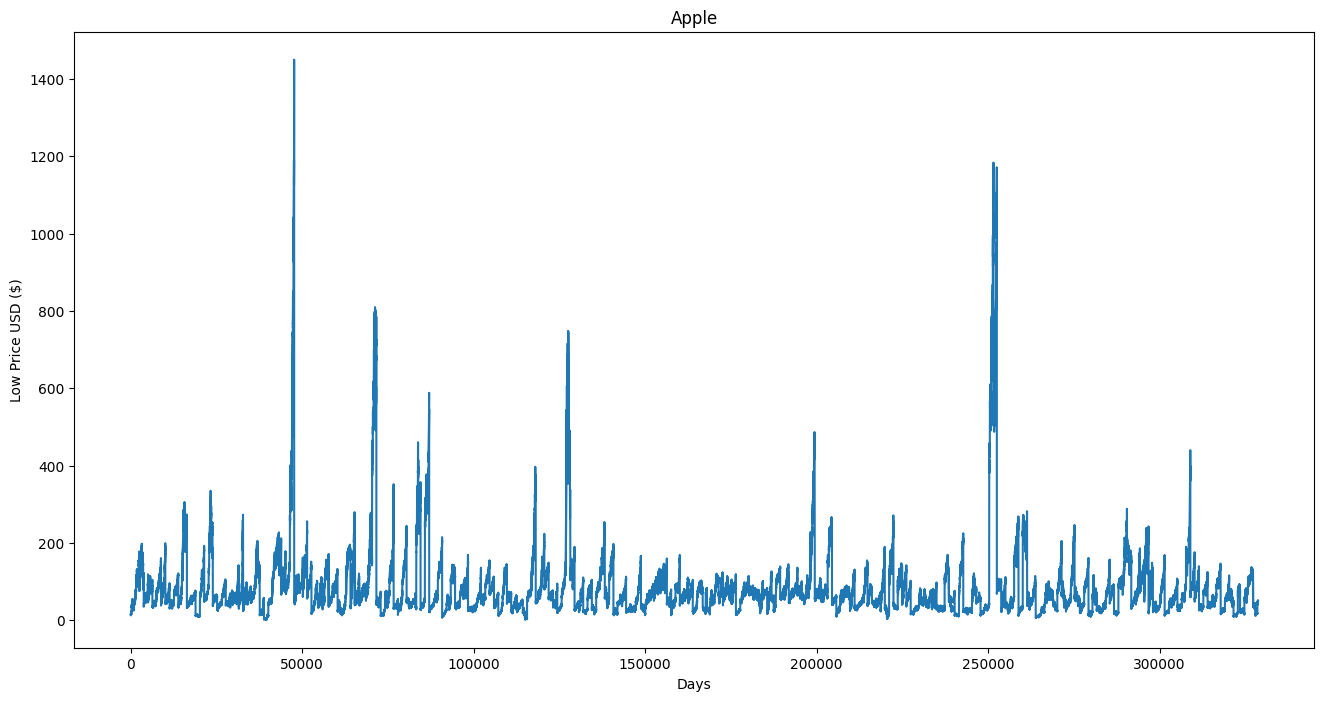

In [21]:
# Visualizing the low prices of the data.
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('Low Price USD ($)')
plt.plot(df['low'])
plt.show()


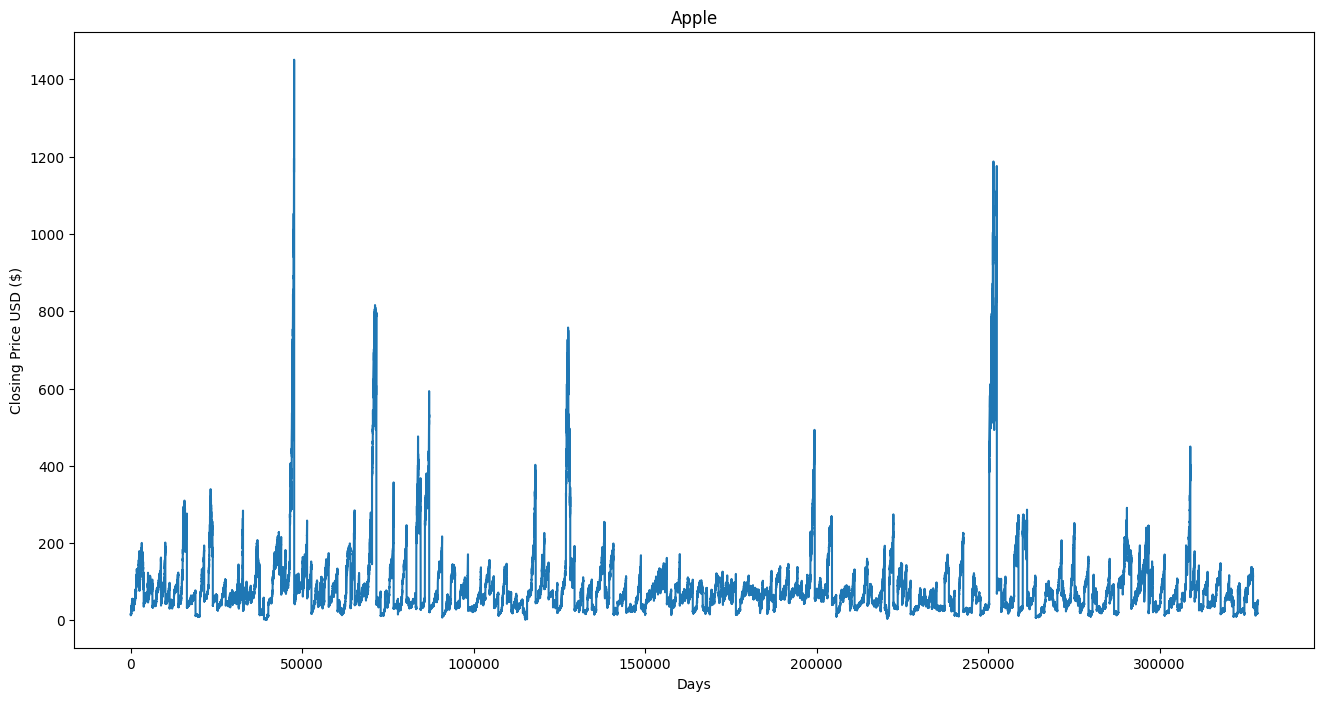

In [22]:
# Visualizing the closing prices of the data.
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('Closing Price USD ($)')
plt.plot(df['close'])
plt.show()

In [23]:
df2 = df['close']
df2.tail()

328707    49.69
328708    50.09
328709    50.11
328710    50.45
328711      NaN
Name: close, dtype: float64

In [24]:
df2 = pd.DataFrame(df2)
df2.tail()

,close
328707,49.69
328708,50.09
328709,50.11
328710,50.45
328711,NaN


In [25]:
# Prediction 100 days into the future.
future_days = 100
df2['Prediction'] = df2['close'].shift(-future_days)
df2.tail()

,close,Prediction
328707,49.69,NaN
328708,50.09,NaN
328709,50.11,NaN
328710,50.45,NaN
328711,NaN,NaN


In [26]:
X = np.array(df2.drop(['Prediction'], 1))[:-future_days]
print(X)

[[14.75]
 [14.46]
 [14.27]
 ...
 [48.08]
 [48.67]
 [48.53]]


In [27]:
y = np.array(df2['Prediction'])[:-future_days]
print(y)

[16.75 16.84 16.94 ... 50.11 50.45   nan]


Linear and Decision Tree Regression

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [32]:

nan_indices = pd.isna(y_train)
nan_rows = x_train[nan_indices]
print(nan_rows)


[[48.53]]


In [33]:
x_train = x_train[~nan_indices]
y_train = y_train[~nan_indices]


In [35]:
from sklearn.impute import SimpleImputer
import numpy as np

# Assuming y_train is a 1D array, reshape it to a 2D array
y_train = y_train.reshape(-1, 1)

# Create and fit the imputer
imputer = SimpleImputer(strategy='mean')
y_train = imputer.fit_transform(y_train)

# If needed, reshape it back to 1D
y_train = y_train.ravel()


In [36]:
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)


In [37]:
x_future = df2.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[39.36],
       [40.05],
       [39.48],
       [38.5 ],
       [38.92],
       [38.24],
       [38.32],
       [38.59],
       [38.41],
       [38.38],
       [39.41],
       [40.24],
       [40.65],
       [40.91],
       [41.41],
       [41.37],
       [41.22],
       [41.33],
       [41.47],
       [41.66],
       [41.56],
       [41.04],
       [41.07],
       [40.18],
       [40.35],
       [40.31],
       [40.84],
       [41.12],
       [41.7 ],
       [41.18],
       [41.49],
       [40.7 ],
       [41.11],
       [41.35],
       [42.38],
       [41.68],
       [43.31],
       [45.2 ],
       [43.99],
       [42.09],
       [42.45],
       [41.53],
       [41.17],
       [42.76],
       [43.39],
       [44.1 ],
       [44.49],
       [45.  ],
       [44.82],
       [45.12],
       [46.04],
       [45.2 ],
       [46.  ],
       [46.23],
       [46.25],
       [46.82],
       [47.09],
       [47.11],
       [46.98],
       [47.07],
       [48.07],
       [48.42],
       [

In [38]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)

[42.67428571 43.26972222 41.88958333 41.57829032 42.2275     39.72875
 42.24710526 52.27427879 41.235      43.10551724 39.80352941 43.64703704
 42.15217391 42.06635714 46.43411765 46.26269231 41.04520833 44.71238095
 45.47625    41.42294118 41.45333333 44.69775    45.54181818 43.255
 42.15068182 42.01038462 44.06047619 44.90538462 56.07555    45.98794118
 43.9315     46.94477273 47.4475     43.34547619 45.06285714 45.8985
 46.85625    46.56       45.40434211 44.34714286 45.3366129  59.72007826
 43.19       47.2856     45.80594444 45.92763889 47.51217391 46.38577778
 47.72363636 75.929456   49.24909677 46.56       51.25392632 48.03020833
 50.24390625 49.60316571 52.26939394 49.33397059 46.91583333 49.72211111
 51.28452703 53.56667391 47.88513889 50.84083056 48.98983143 48.3747619
 47.72966667 49.53588387 50.3845     46.31925926 47.17496774 51.43703704
 49.42451613 49.78588667 49.01796296 45.72044118 49.3555303  51.80145161
 52.26939394 49.23114286 58.95139412 50.32090909 47.15230769 48.

In [39]:
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[44.30604639 44.92025908 44.41286599 43.54050594 43.91437453 43.30906348
 43.38027654 43.62062064 43.46039124 43.43368634 44.35055456 45.08939011
 45.45435708 45.68579954 46.1308812  46.09527467 45.96175017 46.05966813
 46.184291   46.35342203 46.2644057  45.80152077 45.82822567 45.03598032
 45.18730808 45.15170155 45.62348811 45.87273384 46.38902856 45.92614363
 46.20209426 45.49886524 45.8638322  46.0774714  46.99433962 46.37122529
 47.8221915  49.50460018 48.42750256 46.73619225 47.05665105 46.2377008
 45.917242   47.33260168 47.89340457 48.52542053 48.87258422 49.32656751
 49.16633811 49.43338711 50.25233736 49.50460018 50.21673083 50.42146839
 50.43927166 50.94666475 51.18700885 51.20481211 51.08909088 51.16920558
 52.0593689  52.37092606 51.74781174 52.59346689 51.85463134 52.2463032
 51.48076274 51.15140232 50.84874679 51.05348435 50.81314025 51.02677945
 50.90215659 51.00897618 50.32355043 49.79835407 50.68851739 51.28492681
 51.18700885 50.75082882 50.10991123 51.09799252 50.5

In [40]:
predictions = tree_prediction
valid = df2[X.shape[0]:]
valid['Predictions'] = predictions

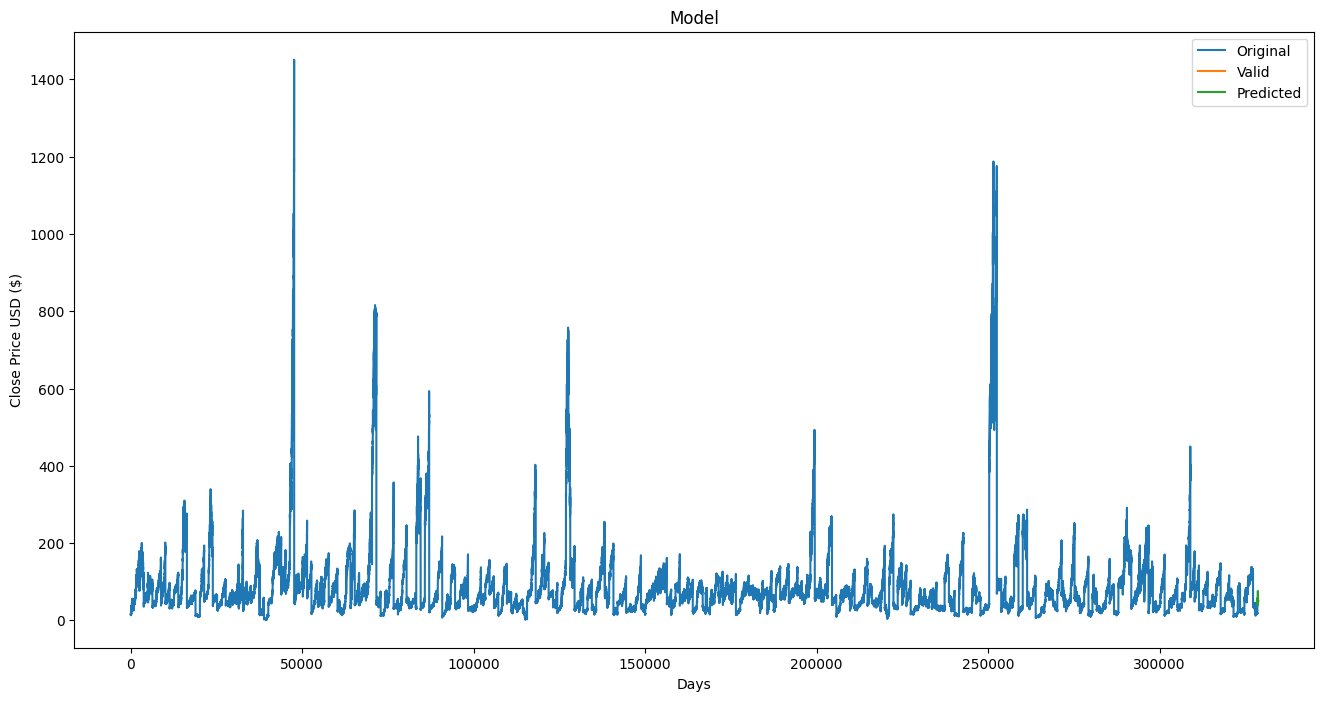

In [41]:
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df2['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(["Original", "Valid", 'Predicted'])
plt.show()